# Lead Scoring Assignment (X EDUCATION Lead Conversion)

  To improve the lead conversion rate of an education company, named X Education, who sells online courses to industry professionals, we need to analyze the importance of variables given in the dataset. We will try to maximize the lead conversion rate by helping the company to recognize the best promising leads who will convert into a paying customer. We need to build a model and assign a lead score for every customer so that we can help the company to make a conversion rate of the leads around 80%.

In [1]:
import warnings
warnings.filterwarnings('ignore')


#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


## Data Description

In this part we will load the dataset and inspect the data

In [2]:
# Read data
Education = pd.read_csv("Leads.csv")
Education.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
print(Education.describe())

         Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     

Describing statistical data

In [4]:
print(Education.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

info of the dataset

In [5]:
print("\nShape -",Education.shape)


Shape - (9240, 37)


 So the dataset has 9240 rows and 37 columns

In [6]:
#checking duplicate value
sum(Education.duplicated(subset = 'Prospect ID')) == 0

True

## Data Cleaning

In [7]:
# percentage of missing values in each column
100*(Education.isnull().sum()/len(Education.index)).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [8]:
#dropping columns having more than 30% null value
cols = Education.columns
for i in cols:
    if 100*Education.isnull().sum()[i]/len(Education.index)>30:
        Education.drop(i, axis = 1, inplace = True)
# percentage of missing values in each column
100*(Education.isnull().sum()/len(Education.index)).sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Number                                       0.000000
Lead Origin                                       0.000000
Do Not Email                                      0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
Do Not Call                                       0.0000

Those columns having more than 30% of null values are dropped

In [9]:
# # row-wise null count percentage
# round(100*(Education.isnull().mean(axis=1)).sort_values(ascending=False), 2)

In [10]:
#value count for 'Country' in the dataset
Education['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Canada                     4
Germany                    4
Nigeria                    4
South Africa               4
Kuwait                     4
Sweden                     3
Uganda                     2
Philippines                2
Italy                      2
Belgium                    2
Asia/Pacific Region        2
Netherlands                2
China                      2
Ghana                      2
Bangladesh                 2
Vietnam                    1
Indonesia                  1
Denmark                    1
Switzerland                1
Sri Lanka                  1
Kenya         

The variable 'Country' in the dataset has value 'India' 6492 times and 'NaN' value 2461 times. Others values are very few in number. So this column has data imbalance. 

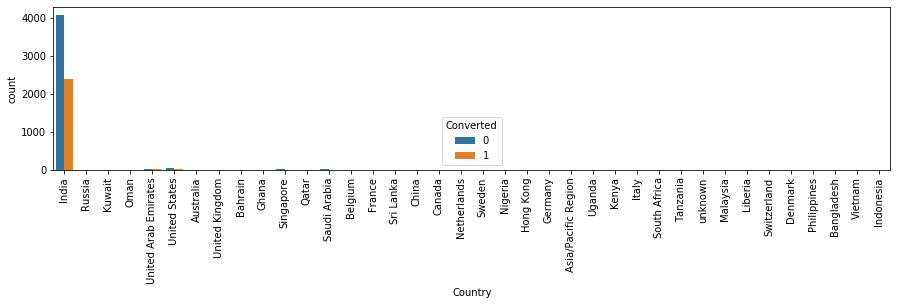

In [11]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,3))
s1=sns.countplot(Education.Country, hue=Education.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Showing data imbalance of 'Country' column by countplot. 

In [12]:
Education.drop(columns= ['Country'], inplace = True)

We drop this column because it has data imbalance

In [13]:
Education.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

Checking the unique values of the dataset. We can observe that 'Prospect ID' and 'Lead Number' has all unique value. On the other side 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque' has only one type of value in the whole column. So we basically drop these columns.

In [14]:
Education.drop(columns=['Prospect ID', 'Lead Number', 'Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content', 'I agree to pay the amount through cheque'], inplace = True)

In [15]:
Education

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Select,Select,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Select,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Potential Lead,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Select,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Select,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Potential Lead,Mumbai,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Potential Lead,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Potential Lead,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,NaN,Other Metro Cities,No,SMS Sent


In [16]:
#  cols = Education.columns
#  for i in cols:
#      if (Education[i].unique()).astype(int)==len(Education) & (Education[i].unique()).astype(int)==1 :
#         Education.drop(i, axis = 1, inplace = True)

In [17]:
#  cols = Education.columns
#  for i in cols:
#      if (Education[i].unique()).astype(np.int)==len(Education) & (Education[i].unique()).astype(np.int)==1 :
#         Education.drop(i, axis = 1, inplace = True)

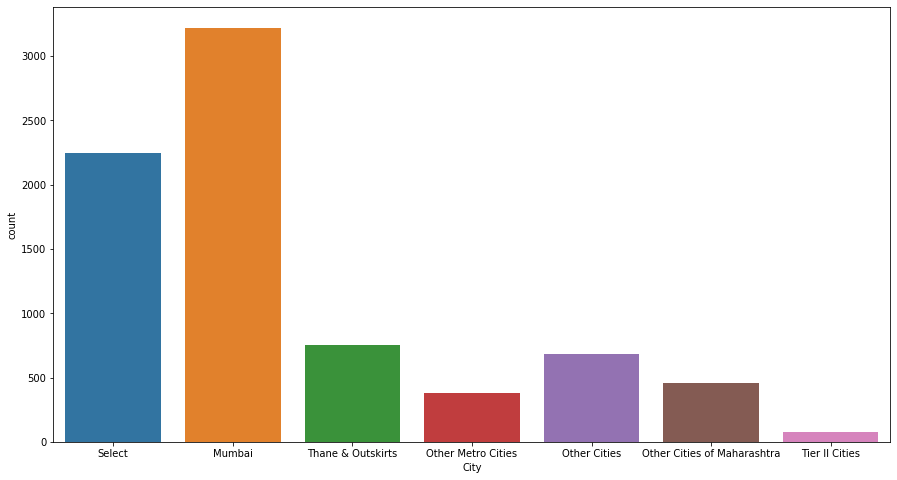

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(Education['City'])

Countplot of the City column. Where we can observe That 'Mumbai' has over 3000 counts and 'Select'  has more than 2000 value count, which is actually similar to null value.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

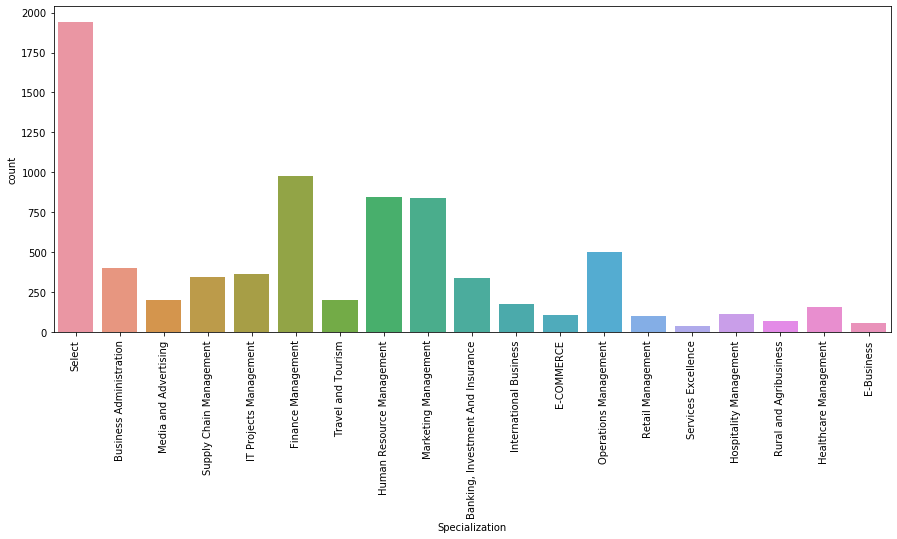

In [19]:
from matplotlib.pyplot import xticks
plt.figure(figsize=(15,6))
sns.countplot(Education['Specialization'])
xticks(rotation=90)

Countplot of 'Specialization' column. here we can observe that the 'Select' has too much value count which is actually null value.

In [20]:
Education['Specialization']= Education['Specialization'].replace('Select',np.nan)

Replacing the 'Select' value of 'Specialization' column to null value

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

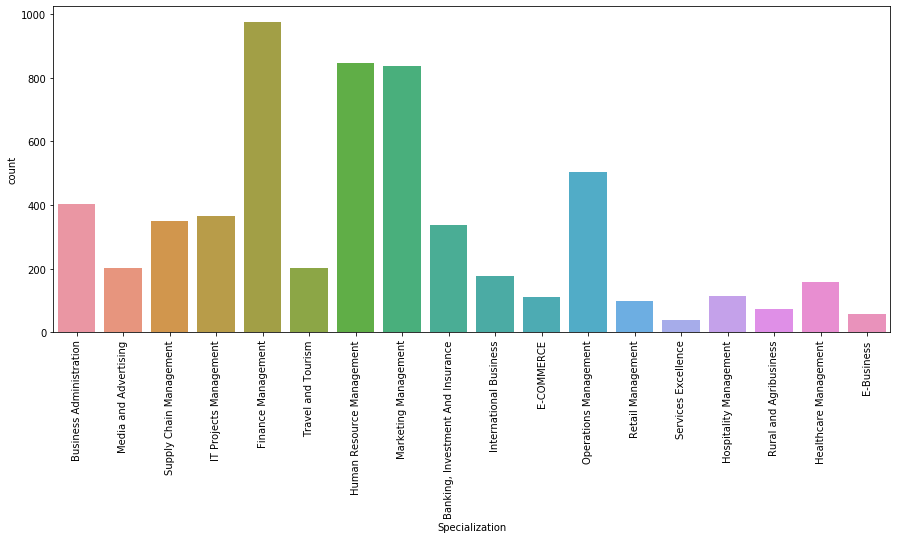

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(Education['Specialization'])
xticks(rotation=90)

Here in the countplot of 'Specialization' column all 'Select' values are converted to null values. So they are not seen in here.

In [22]:
# value count of 'Specialization'
Education['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

Checking the value count of 'Specialization' Column.

In [23]:
#'Lead Source' value count
Education['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
NC_EDM                  1
blog                    1
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
Name: Lead Source, dtype: int64

Checking the 'Lead Source' value count.

In [24]:
#Checking the null value of Lead Source
Education['Lead Source'].isnull().sum()

36

The 'Lead Source' has total 36 null values.

In [25]:
Education['Lead Source']= Education['Lead Source'].replace('google', 'Google')
Education['Lead Source']= Education['Lead Source'].replace(np.nan,'Others')
Education['Lead Source']= Education['Lead Source'].replace('Facebook', 'Social Media')
Education['Lead Source']= Education['Lead Source'].replace(['bing','Press_Release','Pay per Click Ads', 'youtubechannel','NC_EDM', 'blog', 'WeLearn', 'welearnblog_Home', 'testone'],'Others')

Replacing 'google' as 'Google'

And also replacing 'Facebook' as 'Social Media'

and ['bing','Press_Release','Pay per Click Ads', 'youtubechannel','NC_EDM', 'blog', 'WeLearn', 'welearnblog_Home', 'testone'] as 'Others'.

So we have less variety in the value. So we can analyze them easily through the model.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

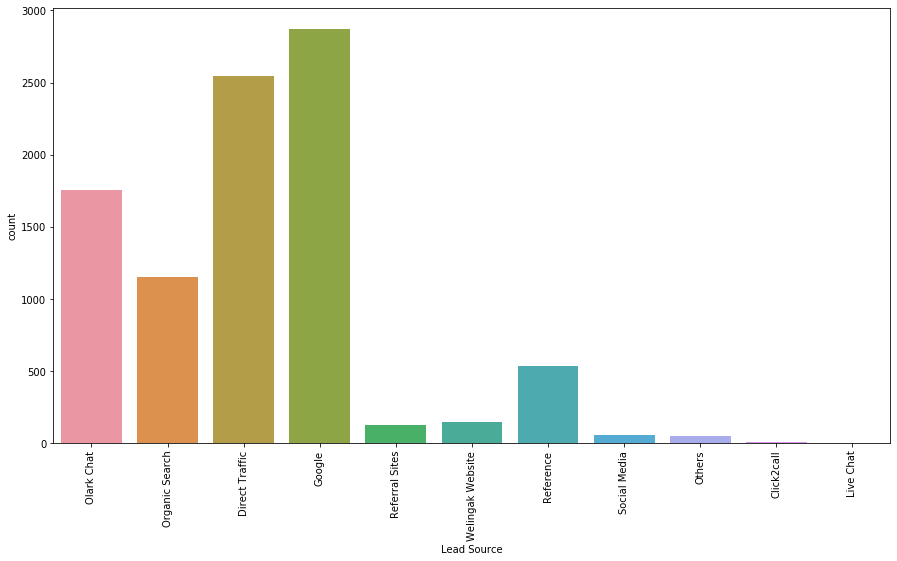

In [26]:
#countplot of 'Lead Source'
plt.figure(figsize=(15,8))
sns.countplot(Education['Lead Source'])
xticks(rotation=90)

'Lead Source' countplot

In [27]:
#value count check
Education['Last Activity'].value_counts(dropna= False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

'Last Activity' values counts are shown with null.

In [28]:
#replacing values
Education['Last Activity']= Education['Last Activity'].replace([np.nan,'Unreachable','Unsubscribed',
'Had a Phone Conversation',          
'Approached upfront',                 
'View in browser link Clicked',       
'Email Marked Spam',                 
'Email Received',                     
'Visited Booth in Tradeshow',         
'Resubscribed to emails'  ],'Others')

All the unnecessary values(np.nan,'Unreachable','Unsubscribed',
'Had a Phone Conversation',          
'Approached upfront',                 
'View in browser link Clicked',       
'Email Marked Spam',                 
'Email Received',                     
'Visited Booth in Tradeshow',         
'Resubscribed to emails') of 'Last Activity' are replaced as 'Others'.

It has very less number of null valuewhich will not affect our analysis. So we put them in 'Others'

In [29]:
Education['Last Activity'].value_counts(dropna= False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

Checking value count of 'Last Activity'.

In [30]:
# value count check of 'How did you hear about X Education'
Education['How did you hear about X Education'].value_counts(dropna= False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [31]:
#replacing 'Select' as null value in 'How did you hear about X Education' column
Education['How did you hear about X Education']= Education['How did you hear about X Education'].replace('Select',np.nan)

In [32]:
Education['How did you hear about X Education'].value_counts(dropna= False)

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [33]:
Education['Lead Profile'].value_counts(dropna= False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [34]:
Education['Lead Profile']= Education['Lead Profile'].replace('Select',np.nan)

In [35]:
Education['Lead Profile'].value_counts(dropna= False)

NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [36]:
#Checking again the null value percentage
100*(Education.isnull().sum()/len(Education.index)).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
Last Notable Activity                             0.000000
A free copy of Mastering The Interview            0.000000
Search                                            0.0000

3 columns have more than 30% of null value so we will remove them.

In [37]:
#dropping columns having more than 30% null value
cols = Education.columns
for i in cols:
    if 100*Education.isnull().sum()[i]/len(Education.index)>30:
        Education.drop(i, axis = 1, inplace = True)
# percentage of missing values in each column
100*(Education.isnull().sum()/len(Education.index)).sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
Last Notable Activity                             0.000000
A free copy of Mastering The Interview            0.000000
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

After removing the column we have 20 columns left to furthur model building and analysis

## Exploratory Data Analysis

### Bivariate Analysis

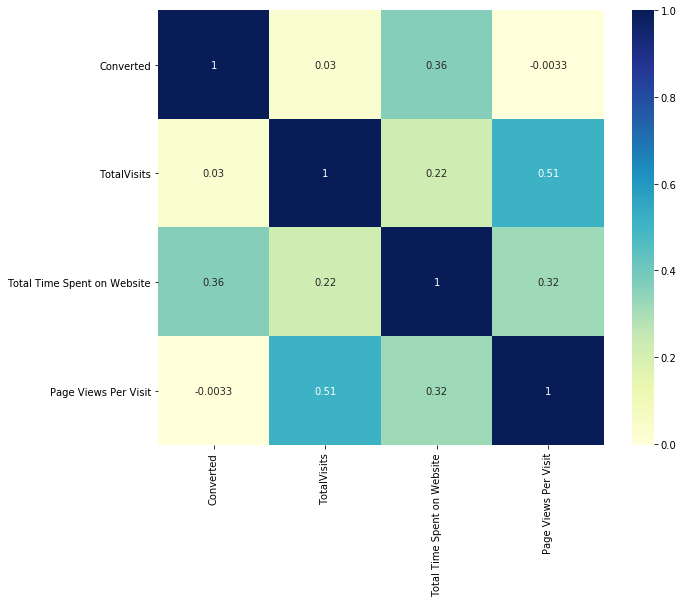

In [38]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(Education.corr(), cmap="YlGnBu", annot= True)
plt.show()


From the Heatmap we can say that there is no high correlation between these variables. So we cannot analyze much from this heatmap.

## Outlier Check

In [39]:
#Checking the dataset
Education

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Unemployed,Better Career Prospects,No,No,No,No,No,No,Select,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Unemployed,Better Career Prospects,No,No,No,No,No,No,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Student,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,NaN,NaN,No,No,No,No,No,No,Other Metro Cities,No,SMS Sent


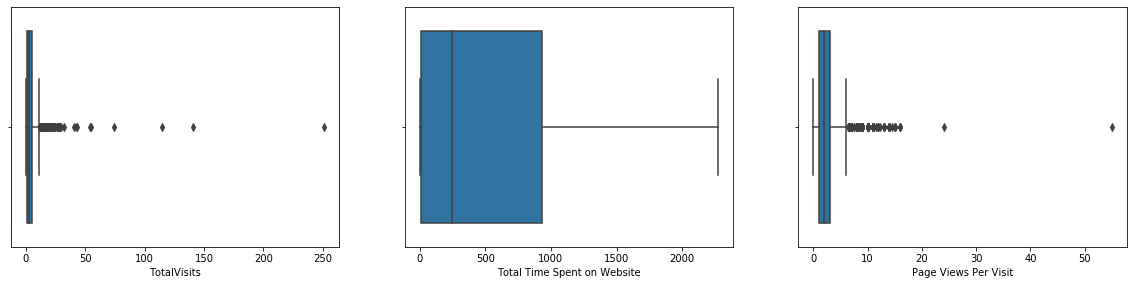

In [40]:
# box-plot of numerical variables
plt.figure(figsize = (20, 15))
Edu_col = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for i in enumerate(Edu_col):
    plt.subplot(3, 3, i[0]+1)
    sns.boxplot(Education[i[1]])

From the box plot we can say that there is outlier in 'TotalVisits' and 'Page Views Per Visit'

In [41]:
#capping method applied to remove outliers

#q1 = Education['TotalVisits'].quantile(0.01)
q4 = Education['TotalVisits'].quantile(0.95)
#Education['TotalVisits'][Education['TotalVisits'] >= q1] = q1
Education['TotalVisits'][Education['TotalVisits'] >= q4] = q4

#q1 = Education['Total Time Spent on Website'].quantile(0.01)
q4 = Education['Total Time Spent on Website'].quantile(0.95)
#Education['Total Time Spent on Website'][Education['Total Time Spent on Website'] >= q1] = q1
Education['Total Time Spent on Website'][Education['Total Time Spent on Website'] >= q4] = q4

#q1 = Education['Page Views Per Visit'].quantile(0.01)
q4 = Education['Page Views Per Visit'].quantile(0.95)
#Education['Page Views Per Visit'][Education['Page Views Per Visit'] >= q1] = q1
Education['Page Views Per Visit'][Education['Page Views Per Visit'] >= q4] = q4

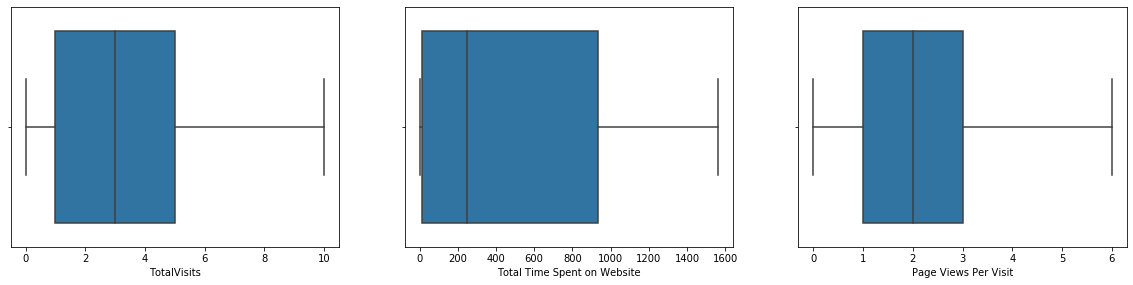

In [42]:
#applying boxplot after capping
plt.figure(figsize = (20, 15))
Edu_col = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for i in enumerate(Edu_col):
    plt.subplot(3, 3, i[0]+1)
    sns.boxplot(Education[i[1]])

After capping method applied The outlier from the numerical variables are removed

In [43]:
# Creating dummy variables

Education = pd.get_dummies(Education, drop_first=True)

Education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 63 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Converted                                                                9240 non-null   int64  
 1   TotalVisits                                                              9103 non-null   float64
 2   Total Time Spent on Website                                              9240 non-null   int64  
 3   Page Views Per Visit                                                     9103 non-null   float64
 4   Lead Origin_Landing Page Submission                                      9240 non-null   uint8  
 5   Lead Origin_Lead Add Form                                                9240 non-null   uint8  
 6   Lead Origin_Lead Import                                                 

In [44]:
#Checking the dataset after dummy variable creation
Education

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1562,2.67,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


After creating dummy variables the total column number is 63

In [45]:
#outlier checking and Removal

In [46]:
Q1 = Education['Page Views Per Visit'].quantile(0.25)
Q3 = Education['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
Education=Education.loc[(Education['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (Education['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

In [47]:
Q1 = Education['TotalVisits'].quantile(0.25)
Q3 = Education['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
Education=Education.loc[(Education['TotalVisits'] >= Q1 - 1.5*IQR) & (Education['TotalVisits'] <= Q3 + 1.5*IQR)]

## Train Test Split

In [48]:
X = Education.drop('Converted', axis = 1) 

X has all the variable except 'Converted'. So we drop it.

In [49]:
y = Education['Converted']

Y has only 'Converted' variable/column .

In [50]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

y_train.dtype

dtype('int64')

Splitting the datset into train and test With 70:30 ratio

# Feature Scaling#

In [51]:

# X_train, y_test = train_test_split(Education, train_size = 0.70, test_size = 0.30, random_state = 333)

In [52]:
#scaling the continuous variables in the dataset
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,-0.068258,1.541275,-0.423364,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5520,1.362470,-0.782357,2.083179,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1962,0.647106,-0.575770,0.133646,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1566,2.435517,1.455987,0.690655,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9170,-1.141305,-0.896074,-1.258878,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [53]:
# Calculating the Lead Conversion Rate
converted = (sum(Education['Converted'])/len(Education['Converted'].index))*100
converted

38.02043282434362

Lead conversion rate is 38% at the moment

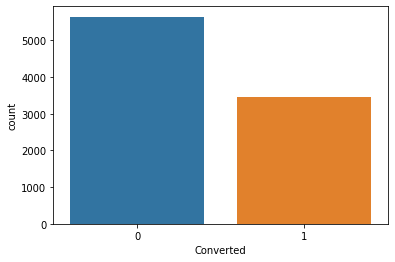

In [54]:
#Countplot of converted and not converted
sns.countplot(y)

Countplot of Converted and not converted. Where '1' denotes the converted and '0' denotes not converted with count.

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 7962 to 5734
Data columns (total 62 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   TotalVisits                                                              6372 non-null   float64
 1   Total Time Spent on Website                                              6372 non-null   float64
 2   Page Views Per Visit                                                     6372 non-null   float64
 3   Lead Origin_Landing Page Submission                                      6372 non-null   uint8  
 4   Lead Origin_Lead Add Form                                                6372 non-null   uint8  
 5   Lead Origin_Lead Import                                                  6372 non-null   uint8  
 6   Lead Origin_Quick Add Form                                           

Checking the info of the X_train.

In [56]:
y_train.dtype

dtype('int64')

# Model Building

In [57]:
#Creating Logistic Regression Model

In [58]:
import statsmodels.api as sm
logis_reg = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())

In [59]:
X_train.dtypes

TotalVisits                                                                float64
Total Time Spent on Website                                                float64
Page Views Per Visit                                                       float64
Lead Origin_Landing Page Submission                                          uint8
Lead Origin_Lead Add Form                                                    uint8
Lead Origin_Lead Import                                                      uint8
Lead Origin_Quick Add Form                                                   uint8
Lead Source_Direct Traffic                                                   uint8
Lead Source_Google                                                           uint8
Lead Source_Live Chat                                                        uint8
Lead Source_Olark Chat                                                       uint8
Lead Source_Organic Search                                                   uint8
Lead

In [60]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
print(num_cols)

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,-0.068258,1.541275,-0.423364,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5520,1.362470,-0.782357,2.083179,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1962,0.647106,-0.575770,0.133646,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1566,2.435517,1.455987,0.690655,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9170,-1.141305,-0.896074,-1.258878,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Scaling numerical columns using fit and transform

In [61]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

Recursive Feature Elimination with 15 columns.

In [62]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 20),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 44),
 ('Lead Origin_Quick Add Form', False, 47),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 36),
 ('Lead Source_Olark Chat', False, 13),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Others', False, 25),
 ('Lead Source_Reference', False, 24),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 31),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Do Not Call_Yes', False, 11),
 ('Last Activity_Email Bounced', False, 45),
 ('Last Activity_Email Link Clicked', False, 23),
 ('Last Activity_Email Opened', False, 4),
 ('Last Activity_Form Submitted on Website', False, 21),
 ('Last Activity_Olark Chat Conversation', False, 1

value and ranking ofthe columns are shown according to the Logistic Regression Model. True denote the column has more importancy and False means less importancy. Where The ranking is done how much important or how much unimportant the variable is.

In [63]:
# Checking only true values
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [64]:
# Checking the False values
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Do Not Call_Yes',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Other', 'Search_Yes',
       'Newspaper Article_Yes', 'X Education Forums_Yes', 'Newspaper_Yes',
       'Digital Advertisement_Yes', 'Through Recommendations_Yes',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Select', 'City_Thane & Outskirt

In [65]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Others,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7962,1.541275,0,0,1,0,0,0,0,0,1,0,0,0,1,0
5520,-0.782357,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1962,-0.575770,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1566,1.455987,0,0,1,0,0,0,0,0,0,0,0,0,0,1
9170,-0.896074,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.637219,0,0,0,0,1,0,0,0,0,0,0,0,0,0
82,-0.896074,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8173,1.509055,0,0,1,0,0,0,1,0,0,0,0,0,0,1
7055,-0.765299,0,1,0,0,0,0,0,0,1,0,0,0,0,1


Created a dataframe with only True value

### Building Linear Model using 'STATS MODEL'

VIF Check

In [66]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
print(X_train_rfe.shape[1])
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

15


,Features,VIF
13,What is your current occupation_Unemployed,2.69
3,Lead Source_Google,1.80
2,Lead Source_Direct Traffic,1.79
1,Lead Origin_Lead Add Form,1.70
9,Last Activity_SMS Sent,1.52
4,Lead Source_Organic Search,1.36
6,Lead Source_Welingak Website,1.32
14,What is your current occupation_Working Profes...,1.32
0,Total Time Spent on Website,1.14
7,Do Not Email_Yes,1.13


We tested the model with only 15 variable. If the VIF value is greater than 5 we can drop drop them otherwise we will keep it.

In [67]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.9
Date:                Mon, 20 Jul 2020   Deviance:                       5285.9
Time:                        23:10:32   Pearson chi2:                 6.35e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4311      0.102    -13.983      0.000      -1.632      -1.230
Total Time Spent on Website                              1.1218      0.040     28.060      0.000       1.043       1.200
Lead Origin_Lead Add Form                                2.6919      0.228     11.819      0.000       2.246       3.138
Lead Source_Direct Traffic                              -1.3125      0.114    -11.520      0.000      -1.536      -1.089
Lead Source_Google                                      -1.0033      0.110     -9.159      0.000      -1.218      -0.789
Lead Source_Organic Search                              -1.1617      0.132     -8.827      0.000      -1.420      -0.904
Lead Source_Referral Sites                              -1.4518      0.353     -4.110      0.000      -2.144      -0.759
Lead Source_Welingak Website                             1.7703      0.752      2.354      0.019       0.296       3.244
Do Not Email_Yes                                        -1.4831      0.169     -8.779      0.000      -1.814      -1.152
Last Activity_Others                                     0.9219      0.219      4.219      0.000       0.494       1.350
Last Activity_SMS Sent                                   1.4752      0.075     19.722      0.000       1.329       1.622
What is your current occupation_Housewife               24.4293    1.6e+04      0.002      0.999   -3.13e+04    3.14e+04
What is your current occupation_Other                    1.8608      0.648      2.874      0.004       0.592       3.130
What is your current occupation_Student                  1.3853      0.239      5.785      0.000       0.916       1.855
What is your current occupation_Unemployed               1.2672      0.087     14.540      0.000       1.096       1.438
What is your current occupation_Working Professional     3.7793      0.196     19.241      0.000       3.394       4.164
========================================================================================================================
"""

We will drop those column having 'p' value greater greater than 5%. Only the column 'What is your current occupation_Housewife' has p value 99.9%. So we will drop it for sure.

In [68]:
col = col.drop('What is your current occupation_Housewife',1)

In [69]:
#Generalized Linear Model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()) # For Logistic regression model
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2654.8
Date:                Mon, 20 Jul 2020   Deviance:                       5309.7
Time:                        23:10:32   Pearson chi2:                 6.38e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4064      0.102    -13.834      0.000      -1.606      -1.207
Total Time Spent on Website                              1.1210      0.040     28.114      0.000       1.043       1.199
Lead Origin_Lead Add Form                                2.7207      0.228     11.943      0.000       2.274       3.167
Lead Source_Direct Traffic                              -1.3018      0.114    -11.454      0.000      -1.525      -1.079
Lead Source_Google                                      -0.9909      0.109     -9.072      0.000      -1.205      -0.777
Lead Source_Organic Search                              -1.1412      0.131     -8.700      0.000      -1.398      -0.884
Lead Source_Referral Sites                              -1.4483      0.353     -4.106      0.000      -2.140      -0.757
Lead Source_Welingak Website                             1.7532      0.752      2.331      0.020       0.279       3.227
Do Not Email_Yes                                        -1.4866      0.169     -8.809      0.000      -1.817      -1.156
Last Activity_Others                                     0.9125      0.218      4.179      0.000       0.485       1.340
Last Activity_SMS Sent                                   1.4640      0.075     19.615      0.000       1.318       1.610
What is your current occupation_Other                    1.8255      0.647      2.820      0.005       0.557       3.094
What is your current occupation_Student                  1.3527      0.239      5.655      0.000       0.884       1.822
What is your current occupation_Unemployed               1.2357      0.086     14.308      0.000       1.066       1.405
What is your current occupation_Working Professional     3.7462      0.196     19.115      0.000       3.362       4.130
========================================================================================================================
"""

Again checking 'p' value for the column. all the 'p' values are greater than 5. so we will kepp them for future model train.

In [70]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.883937
5520    0.087103
1962    0.415080
1566    0.951714
9170    0.235919
5097    0.082343
8954    0.452451
309     0.166968
5519    0.279499
1050    0.536859
dtype: float64

In [71]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.88393695, 0.08710331, 0.41507997, 0.9517144 , 0.23591919,
       0.08234281, 0.45245061, 0.16696774, 0.27949941, 0.53685937])

In [72]:
# Concat the Converted and Converted_prob with Prospect ID in a seperate dataframe
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID
0,0,0.883937,7962
1,0,0.087103,5520
2,0,0.415080,1962
3,1,0.951714,1566
4,0,0.235919,9170


In [73]:
#taking 0.5 as cut-off value
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.883937,7962,1
1,0,0.087103,5520,0
2,0,0.415080,1962,0
3,1,0.951714,1566,1
4,0,0.235919,9170,0


In [74]:
# Calculating the Lead Conversion Rate
converted = (sum(y_train_pred_final['Predicted'])/len(y_train_pred_final['Predicted'].index))*100
converted

33.27055869428751

In [75]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3505  448]
 [ 747 1672]]


In [76]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8124607658505963


In [77]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [78]:
Specificity = TN/(TN+FP)
Specificity

0.8866683531495066

In [79]:
#True positive Rate
Sensitivity = TP/(TP+FN)
Sensitivity

0.6911947085572551

In [80]:
Accuracy = (TN+TP)/(TP+TN+FP+FN)
Accuracy

0.8124607658505963

In [81]:
# (1-Specificity)
False_Positive_Rate = FP/(TN+FP)
False_Positive_Rate

0.1133316468504933

In [82]:
#Precision
Positive_Predictive_Value = TP/(TP+FP)
Positive_Predictive_Value

0.7886792452830189

In [83]:
Negative_Predictive_Value = TN/(TN+FN)
Negative_Predictive_Value

0.8243179680150517

## Plotting ROC Curve

In [84]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [85]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

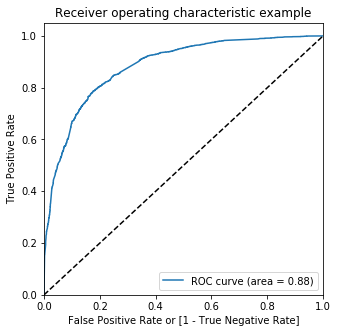

In [86]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Here 0.3 is the saturation point

###  Optimal Cutoff Point

In [87]:
 #Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.883937,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.087103,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.415080,1962,0,1,1,1,1,1,0,0,0,0,0
3,1,0.951714,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.235919,9170,0,1,1,1,0,0,0,0,0,0,0


In [88]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.617389  0.974370  0.398938
0.2   0.2  0.742624  0.919388  0.634455
0.3   0.3  0.795512  0.822241  0.779155
0.4   0.4  0.812461  0.764779  0.841639
0.5   0.5  0.812461  0.691195  0.886668
0.6   0.6  0.793471  0.588260  0.919049
0.7   0.7  0.781701  0.507648  0.949406
0.8   0.8  0.758945  0.410914  0.971920
0.9   0.9  0.713905  0.267879  0.986845


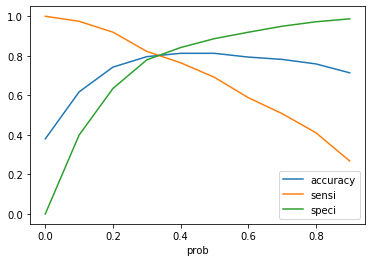

In [89]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability

In [90]:
# From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.883937,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.087103,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.415080,1962,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.951714,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.235919,9170,0,1,1,1,0,0,0,0,0,0,0,0


In [91]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.883937,7962,1,88
1,0,0.087103,5520,0,9
2,0,0.415080,1962,1,42
3,1,0.951714,1566,1,95
4,0,0.235919,9170,0,24


Multiplying the 'Converted_prob'*100 too get the Lead_Score

In [92]:
from sklearn import metrics

# Confusion matrix 
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
print(confusion1)



[[3207  746]
 [ 494 1925]]


In [93]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8124607658505963


In [94]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [95]:
Specificity = TN/(TN+FP)
Specificity

0.8112825701998482

In [96]:
#True positive Rate
Sensitivity = TP/(TP+FN)
Sensitivity

0.7957833815626292

In [97]:
Accuracy = (TN+TP)/(TP+TN+FP+FN)
Accuracy

0.805398618957941

In [98]:
# (1-Specificity)
False_Positive_Rate = FP/(TN+FP)
False_Positive_Rate

0.18871742980015177

In [99]:
#Precision
Positive_Predictive_Value = TP/(TP+FP)
Positive_Predictive_Value

0.7207038562336203

In [100]:
Negative_Predictive_Value = TN/(TN+FN)
Negative_Predictive_Value

0.866522561469873

## Prediction on Test set

In [101]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3504,-0.058621,-0.095872,0.416452,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4050,-1.150166,-0.905854,-1.263530,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7201,-0.422469,0.454304,-0.143542,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1196,0.305228,-0.097782,0.976446,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8219,1.396773,-0.434001,-0.283540,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [102]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Others,Last Activity_SMS Sent,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.095872,0,0,0,1,0,0,0,0,0,0,0,1,0
4050,-0.905854,1,0,0,0,0,0,0,0,1,0,0,1,0
7201,0.454304,0,1,0,0,0,0,1,0,1,0,0,1,0
1196,-0.097782,0,0,0,1,0,0,0,0,0,0,0,1,0
8219,-0.434001,0,1,0,0,0,0,0,0,0,0,0,1,0


In [103]:
X_test_sm = sm.add_constant(X_test)

In [104]:
y_test_pred = res.predict(X_test_sm)

In [105]:
#taking first 10 values
y_test_pred[:10]

3504    0.194767
4050    0.952506
7201    0.271731
1196    0.194432
8219    0.123574
8747    0.081518
9048    0.153858
6524    0.140798
7693    0.100127
8187    0.952506
dtype: float64

In [106]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [107]:
# Let's see the head
y_pred_1.head()

,0
3504,0.194767
4050,0.952506
7201,0.271731
1196,0.194432
8219,0.123574


In [108]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [109]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [110]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [111]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [112]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.194767
1,1,4050,0.952506
2,0,7201,0.271731
3,0,1196,0.194432
4,1,8219,0.123574


In [113]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [114]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.194767
1,1,4050,0.952506
2,0,7201,0.271731
3,0,1196,0.194432
4,1,8219,0.123574


In [115]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [116]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.194767,19
1,4050,1,0.952506,95
2,7201,0,0.271731,27
3,1196,0,0.194432,19
4,8219,1,0.123574,12


In [117]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [118]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,0.194767,19,0
1,4050,1,0.952506,95,1
2,7201,0,0.271731,27,0
3,1196,0,0.194432,19,0
4,8219,1,0.123574,12,0


In [119]:
from sklearn import metrics

# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted)
print(confusion2)

[[1367  322]
 [ 210  832]]


In [120]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))

0.805398618957941


In [121]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [122]:
Specificity = TN/(TN+FP)
Specificity

0.8093546477205447

In [123]:
#True positive Rate
Sensitivity = TP/(TP+FN)
Sensitivity

0.7984644913627639

In [124]:
Accuracy = (TN+TP)/(TP+TN+FP+FN)
Accuracy

0.8051995606005127

In [125]:
# (1-Specificity)
False_Positive_Rate = FP/(TN+FP)
False_Positive_Rate

0.1906453522794553

In [126]:
#Precision
Positive_Predictive_Value = TP/(TP+FP)
Positive_Predictive_Value

0.7209705372616985

In [127]:
Negative_Predictive_Value = TN/(TN+FN)
Negative_Predictive_Value

0.8668357641090678

## Conclusion

We got the Sensitivity value which is also known as 'True Positive Rate' is 80%, We got the Specificity value is also 80% and the Accuracy value is also 80%. Which is the target of our model to achieve. So the model is good to apply can this can give almost 80% lead conversion rate for the speciific X Educational company.


According to the co-efficient of the exponential part in sigmoid curve, we choose three factors having highest positive co-efficient values which have much significance in predicting the hot lead conversion. These top three factors are-
									      
What is your current occupation-‘Working Professional’(coefficient value =  (+3.7462))

Lead Origin- ‘Lead Add Form’                          (coefficient value =  (+2.7207))

What is your current occupation- ‘Other’		      (coefficient value =  (+1.8255))

Considering these variable will definately give us a better result on Lead Conversion percentage.

### Thank You